In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer.pitch as Pitch
import seaborn as sns

In [94]:
#Want to add the dataframe for Lionel Messi
pd.read_csv('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Lionel Messi vs Getafe 2018:19.csv')

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Barcelona,Messi,Dribble,0,24,50,64,47,58
1,Barcelona,Messi,Dribble,0,26,45,55,49,60
2,Barcelona,Messi,Successful Pass,0,27,49,60,51,72
3,Barcelona,Messi,Successful Pass,0,36,44,64,39,49
4,Barcelona,Messi,Ball won,0,41,76,85,-,-
...,...,...,...,...,...,...,...,...,...
75,Barcelona,Messi,Dribble,13,21,55,38,58,32
76,Barcelona,Messi,Dribble,13,23,58,32,48,31
77,Barcelona,Messi,Foul won,13,23,47,30,-,-
78,Barcelona,Messi,Dribble,13,48,23,32,22,25


In [95]:
import numpy as np

#Load the CSV into dataframe
df= pd.read_csv('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Lionel Messi vs Getafe 2018:19.csv')

#Want to list events without end coordinates, i.e. 
events_without_end_coordinates= ['Ball won','Foul won','Dispossessed']

# Assign NaN to end coordinates for specific events
df.loc[df['Event'].isin(events_without_end_coordinates), ['X2', 'Y2']] = np.nan

In [96]:
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Barcelona,Messi,Dribble,0,24,50,64,47,58
1,Barcelona,Messi,Dribble,0,26,45,55,49,60
2,Barcelona,Messi,Successful Pass,0,27,49,60,51,72
3,Barcelona,Messi,Successful Pass,0,36,44,64,39,49
4,Barcelona,Messi,Ball won,0,41,76,85,NaN,NaN
...,...,...,...,...,...,...,...,...,...
75,Barcelona,Messi,Dribble,13,21,55,38,58,32
76,Barcelona,Messi,Dribble,13,23,58,32,48,31
77,Barcelona,Messi,Foul won,13,23,47,30,NaN,NaN
78,Barcelona,Messi,Dribble,13,48,23,32,22,25


In [97]:
#Want to list number of events Messi has in the dataset. Helps with legend.
event_counts=df['Event'].value_counts()
print(event_counts)

Successful Pass      45
Dribble              14
Unsuccessful Pass     6
Foul won              4
Shot on Target        3
Corner kick           2
Free kick             2
Dispossessed          2
Ball won              1
Shot off Target       1
Name: Event, dtype: int64


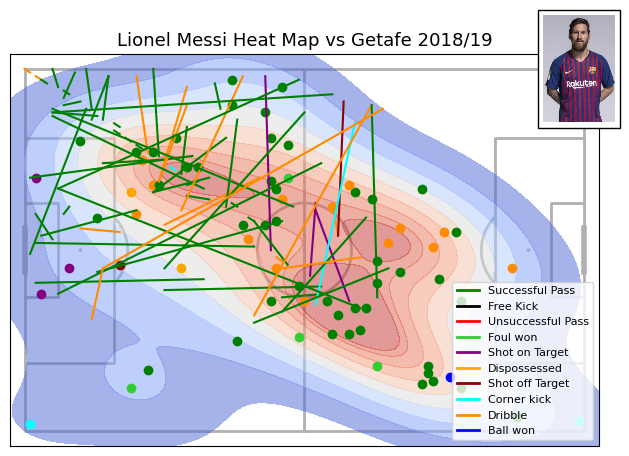

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Create the pitch
pitch = Pitch(pitch_type='wyscout', axis=True, label=True)
fig, ax = pitch.draw()

# Creating the heatmap using kdeplot
sns.kdeplot(
    x=df['X'],  # Use x= for X coordinates
    y=df['Y'],  # Use y= for Y coordinates
    fill=True,  # Fill the contours for better visualization
    cmap='coolwarm',  # Choose a colormap for the heatmap
    ax=ax,  # Use the same pitch axis
    alpha=0.5  # Transparency
)

# Loop through the dataset and plot events with specific colors
for X in range(len(df['X'])):
    if df['Event'][X] == 'Successful Pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='green')
        plt.scatter(df['X'][X], df['Y'][X], color='green')
    if df['Event'][X] == 'Free Kick':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='black')
        plt.scatter(df['X'][X], df['Y'][X], color='black')
    if df['Event'][X] == 'Unsuccessful pass':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='red')
        plt.scatter(df['X'][X], df['Y'][X], color='red')
    if df['Event'][X] == 'Foul won':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='limegreen')
        plt.scatter(df['X'][X], df['Y'][X], color='limegreen')
    if df['Event'][X] == 'Shot on Target':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='purple')
        plt.scatter(df['X'][X], df['Y'][X], color='purple')
    if df['Event'][X] == 'Dispossessed':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='orange')
        plt.scatter(df['X'][X], df['Y'][X], color='orange')
    if df['Event'][X] == 'Shot off Target':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='darkred')
        plt.scatter(df['X'][X], df['Y'][X], color='darkred')
    if df['Event'][X] == 'Corner kick':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='cyan')
        plt.scatter(df['X'][X], df['Y'][X], color='cyan')
    if df['Event'][X] == 'Dribble':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='darkorange')
        plt.scatter(df['X'][X], df['Y'][X], color='darkorange')
    if df['Event'][X] == 'Ball won':
        plt.plot((df['X'][X], df['X2'][X]), (df['Y'][X], df['Y2'][X]), color='blue')
        plt.scatter(df['X'][X], df['Y'][X], color='blue')

#legend
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='Successful Pass'),
    Line2D([0], [0], color='black', lw=2, label='Free Kick'),
    Line2D([0], [0], color='red', lw=2, label='Unsuccessful Pass'),
    Line2D([0], [0], color='limegreen', lw=2, label='Foul won'),
    Line2D([0], [0], color='purple', lw=2, label='Shot on Target'),
    Line2D([0], [0], color='orange', lw=2, label='Dispossessed'),
    Line2D([0], [0], color='darkred', lw=2, label='Shot off Target'),
    Line2D([0], [0], color='cyan', lw=2, label='Corner kick'),
    Line2D([0], [0], color='darkorange', lw=2, label='Dribble'),
    Line2D([0], [0], color='blue', lw=2, label='Ball won'),
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=8)

# Player image (replace with valid path)
player_image = Image.open('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Lionel Messi portrait.jpg'
)
imagebox = OffsetImage(player_image, zoom=0.19)
ab = AnnotationBbox(imagebox, (99, 0), frameon=True, xycoords='data')
ax.add_artist(ab)

# Remove the x and y axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

# Add a title to the heatmap
plt.title('Lionel Messi Heat Map vs Getafe 2018/19', color='black', size=13)
plt.show()

In [ ]:
plt.savefig('/Users/siphuvuyomngxunyeni/Downloads/Football Analytics/Lionel Messi Heat Map vs Getafe.png', dpi=300, bbox_inches='tight')
